# **SMAI Assignment - 2**
##### (Monsoon 2023-24)

> **Name**: *Bhav Beri*
> 
> **Roll Number**: *2021111013*

## _Problem - 4.1_

In [159]:
import os
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [160]:
dataset_path = "../Datasets/SMAI-Dataset-KIMIA-99/"
template_image_name = "bonefishes.png"

In [161]:
# Load template image
template_image = cv2.imread(dataset_path + template_image_name, cv2.IMREAD_GRAYSCALE)
template_image = np.array(template_image)
template_image = template_image

print("Template image shape: ", template_image.shape)

Template image shape:  (128, 128)


In [162]:
# Load Dataset Images
dataset_images = []

if os.path.exists(dataset_path) and os.path.isdir(dataset_path):
    # Get a list of all files in the directory
    file_list = os.listdir(dataset_path)
    file_list.sort()

    # Read all images
    for file in file_list:
        image = cv2.imread(dataset_path + file, cv2.IMREAD_GRAYSCALE)
        image = np.array(image)
        image = cv2.resize(image, (template_image.shape[1], template_image.shape[0]))
        dataset_images.append(image)

print(len(dataset_images))

99


In [163]:
# Perform PCA on the template image
pca_template = PCA()
template_components = pca_template.fit_transform(np.invert(template_image))
# .flatten().reshape(-1, 1)


In [164]:
template_components.shape

(128, 128)

bonefishes.png 8.537736462515939e-07 

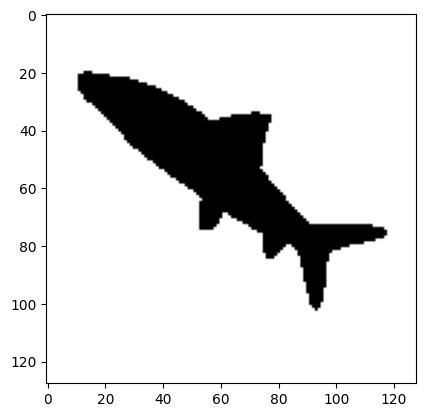

bonefishesocc1.png 1.681868253730888 

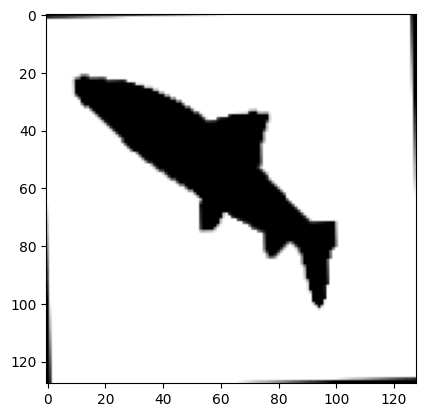

bunny04.png 73.40179799592339 

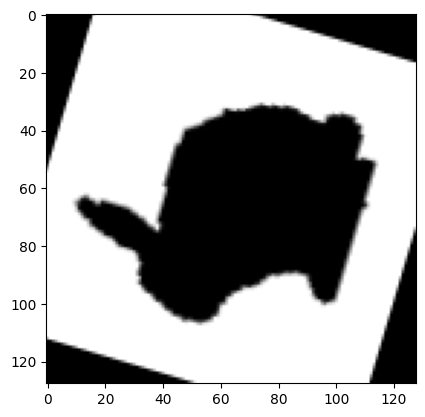

calf1.png 25.010171887826512 

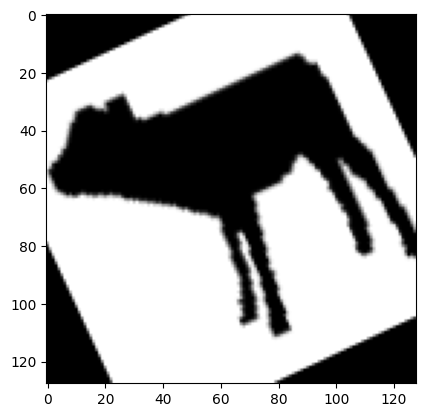

calf2.png 23.49174799567742 

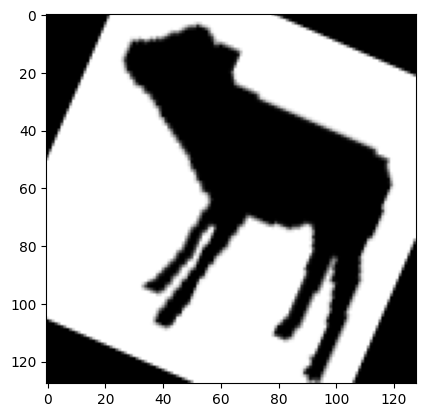

cat1.png 68.04411654952615 

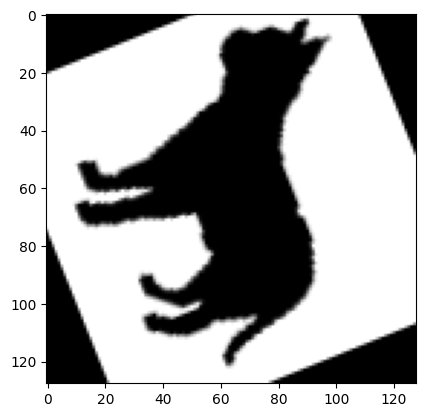

cat2.png 34.84636089545733 

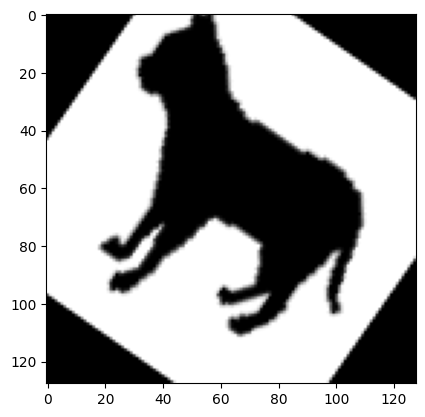

cow1.png 38.240214146263185 

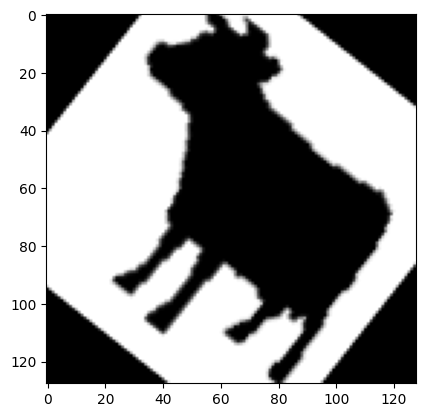

cow2.png 32.3184796223768 

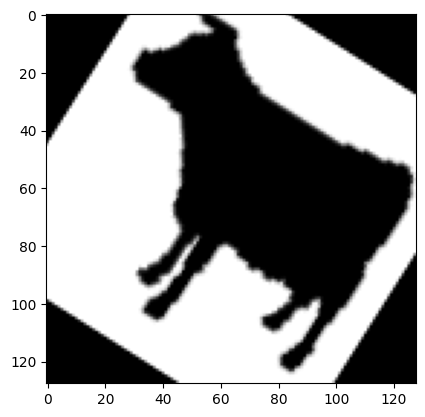

desertcottontail.png 79.45225700882088 

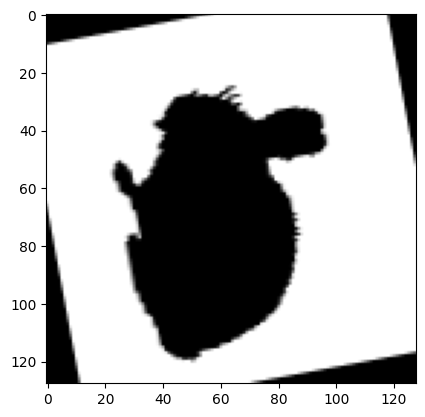

dog1.png 72.2784544897987 

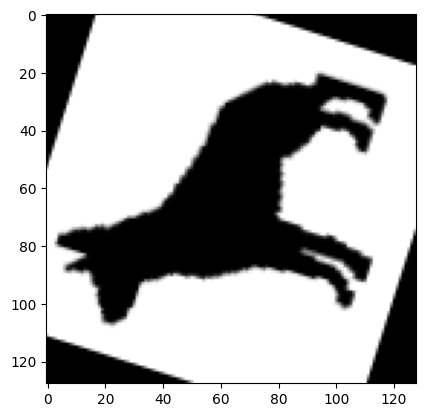

dog2.png 41.555581768590535 

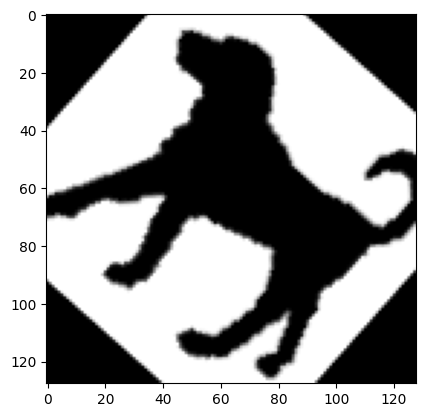

dog3.png 34.49209068213771 

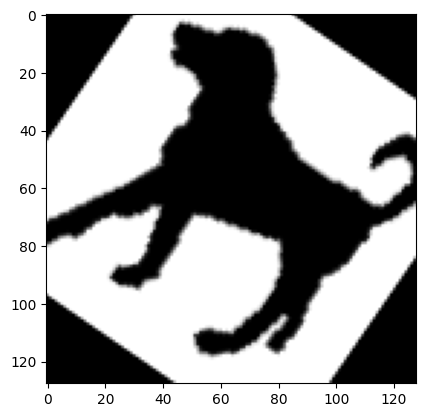

dogfishsharks.png 17.69281388242765 

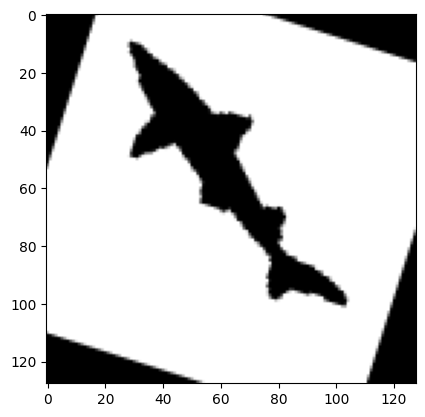

donkey1.png 32.87808793245405 

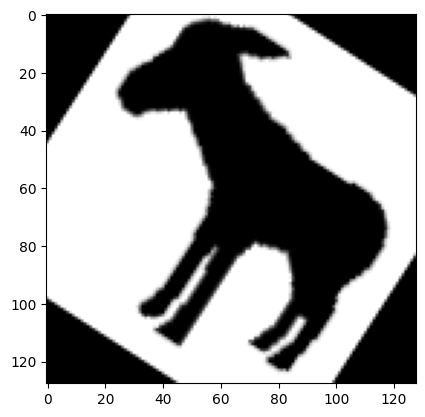

dude0.png 47.00991833730248 

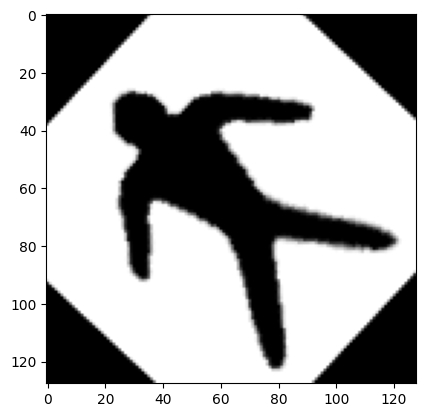

dude1.png 131.05636002343982 

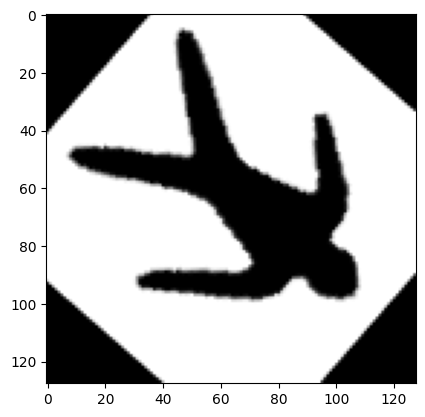

dude10.png 39.980810683102206 

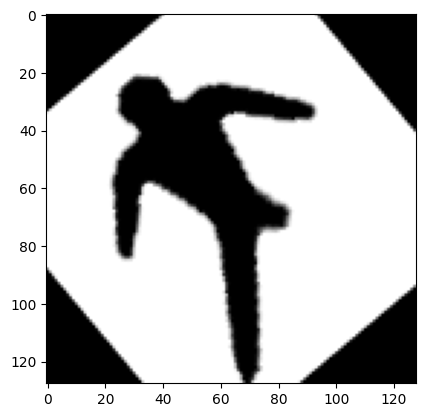

dude11.png 132.7978610761372 

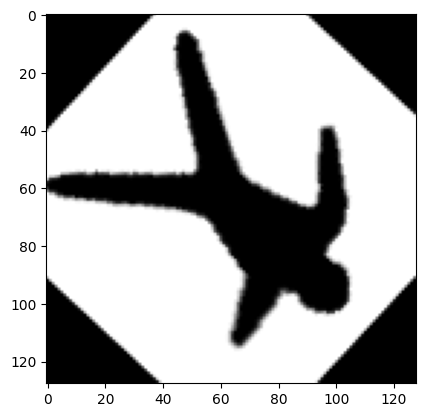

dude12.png 131.6261103291458 

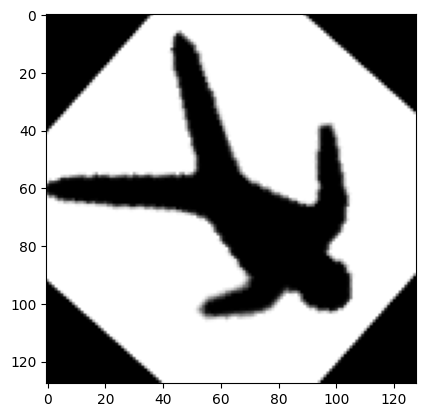

dude2.png 129.77356065085527 

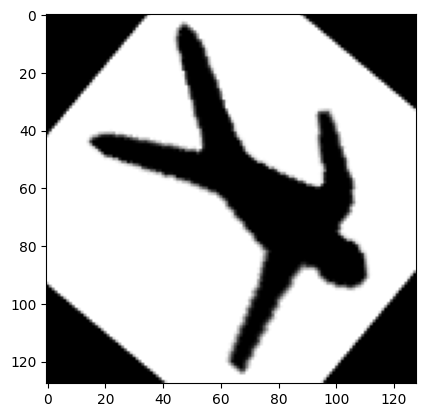

dude4.png 130.2059703420191 

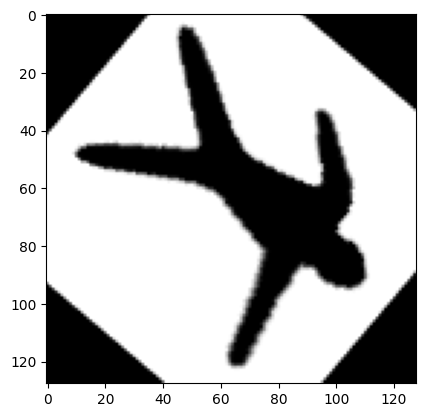

dude5.png 131.57774109887228 

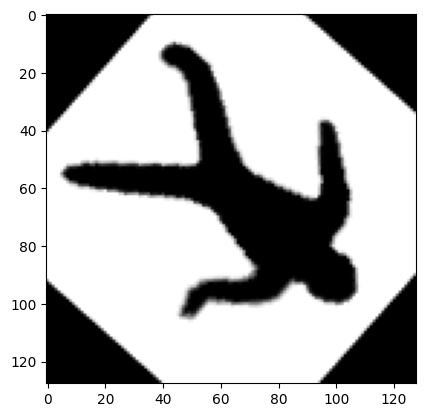

dude6.png 45.802451612487005 

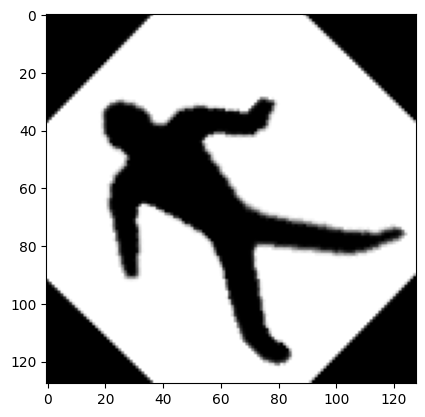

dude7.png 45.99300212656233 

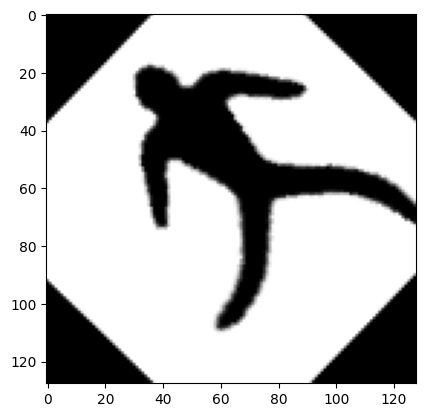

dude8.png 46.71557140158155 

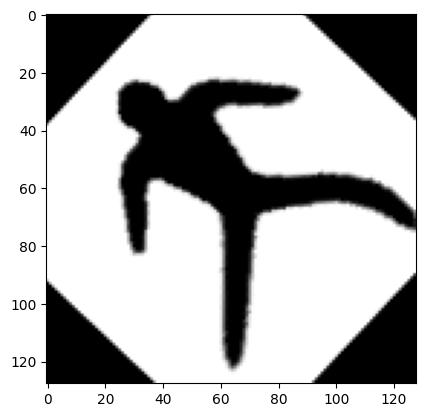

easterncottontail.png 63.85125718569773 

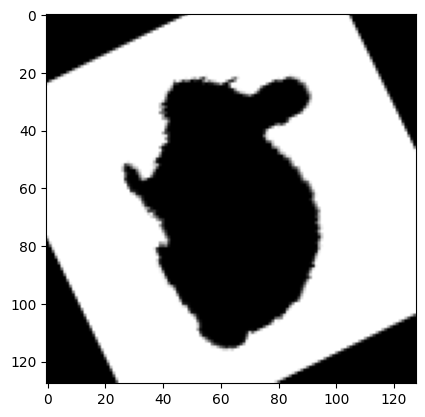

f15.png 31.62269826900319 

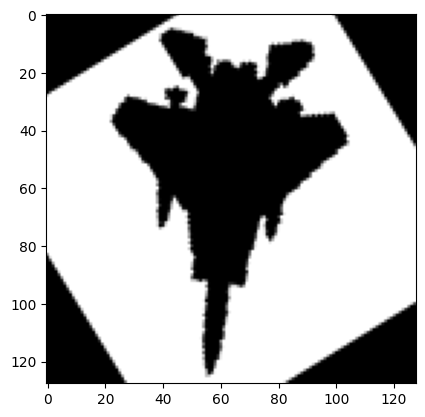

f16.png 47.77316660533476 

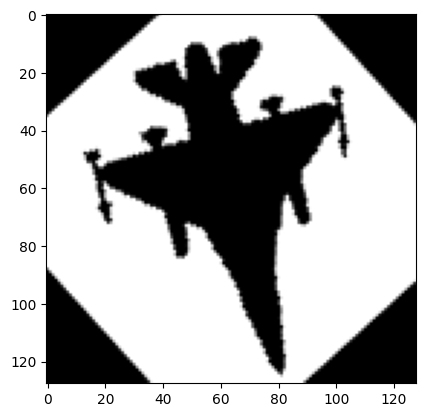

f16occ1.png 47.14869678349908 

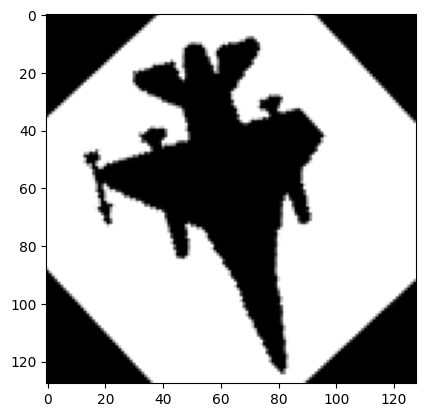

In [165]:
aligned_dataset_images = []
for index, dataset_image in enumerate(dataset_images[:30]):
    # Perform PCA on the dataset image
    pca_dataset = PCA()
    dataset_components = pca_dataset.fit_transform(np.invert(dataset_image))
    # .flatten().reshape(-1, 1)

    # Align the dataset image with the template image using PC1 axis
    dot_product = np.dot(dataset_components[:, 0], template_components[:, 0].T) / (np.linalg.norm(dataset_components[:, 0]) * np.linalg.norm(template_components[:, 0]))
    angle = np.degrees(np.arccos(np.clip(dot_product, -1, 1)))
    print(file_list[index], angle, end=' ')

    # Rotate the dataset image
    rows, cols = dataset_image.shape
    M = cv2.getRotationMatrix2D((cols/2, rows/2), -angle, 1)
    aligned_dataset_image = cv2.warpAffine(dataset_image, M, (cols, rows))
    match_result = cv2.matchTemplate(aligned_dataset_image, template_image, cv2.TM_CCOEFF_NORMED)

    M = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
    aligned_dataset_image1 = cv2.warpAffine(dataset_image, M, (cols, rows))
    match_result1 = cv2.matchTemplate(aligned_dataset_image1, template_image, cv2.TM_CCOEFF_NORMED)

    # Check which match_result value is the maximum
    max_match_result = max(match_result.max(), match_result1.max())
    # print(match_result.max(), match_result1.max(), end=' ')

    # Set new_image as aligned_image based on the maximum match_result
    if max_match_result == match_result.max():
        new_image = aligned_dataset_image
    else:
        new_image = aligned_dataset_image1

    plt.imshow(new_image, cmap='gray')
    plt.show()

    aligned_dataset_images.append(new_image)

#### Algorithm Flowchart

1. Read the `template_image` using `cv2.imread`.

1. - Read the `dataset_image`s using `cv2.imread`.

   - Resize the `dataset_image`s to the same size as the `template_image`, to maintain consistency.

1. Perform Principal Component Analysis (PCA) on the `template_image`:
   - Create a PCA object (`pca_template`).
   - Compute PCA components of the inverted `template_image`.

1. Initialize an empty list `aligned_dataset_images`.

1. For each `dataset_image`:
   - Perform Principal Component Analysis (PCA) on the `dataset_image`:
     - Create a PCA object (`pca_dataset`).
     - Compute PCA components of the inverted `dataset_image`.

   - Align the `dataset_image` with a template image using PC1 axis:
     - Calculate the dot product between the PC1 components of `dataset_image` and the template image.
     - Compute the angle between them in degrees.
     - Print the filename, angle, and continue to the next step. (For debugging purposes)

   - Rotate the `dataset_image` to match the template image:
     - Calculate the size (rows and cols) of the `dataset_image`.
     - Compute the rotation matrix (`M`) to correct the alignment angle.
     - Warp the `dataset_image` using `cv2.warpAffine` to perform the rotation.
     - Apply template matching using `cv2.matchTemplate` to find the match result.
     - Repeat the rotation and matching with the opposite angle.

   - Determine which match result is maximum:
     - Compare the maximum values of both match results, using positive rotation, and one using negative rotation.

   - Set `new_image` as the aligned image based on the maximum match result.

   - Display the `new_image` using `plt.imshow`.

   - Append `new_image` to the `aligned_dataset_images` list.

1. End the loop.

1. The `aligned_dataset_images` list now contains the aligned images.
